In [3]:
import os
from progressbar import ProgressBar
from algorithm.new_algorithms import * 
from bandit_process.arms import *
from matplotlib import pyplot as plt

In [2]:
a=GP_Arm(lengthscale=10, variance=5,sigma=0.1, T=200)

In [18]:
a.variance

5

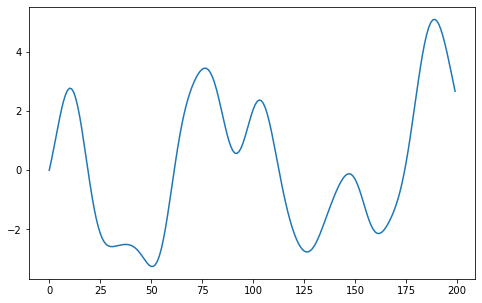

In [3]:
temp1 = a.arm_path
plt.plot(temp1)

In [10]:
rewards=a.reward_path()
rewards = rewards.reshape(-1)
rewards.shape

(200,)

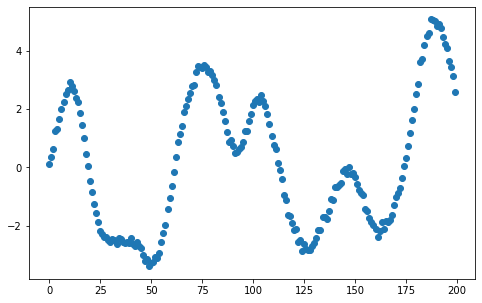

In [15]:
plt.scatter(np.array(range(200)),rewards)

In [13]:
rewards.shape

(200,)

In [8]:
noise = np.random.normal(0,0.1,200)

In [10]:
noise.shape

(200,)

In [32]:
holder=np.zeros(5000)
for i in range(5000):
    holder[i]=np.random.randint(0,4)

In [36]:
len(holder[holder==2])/5000

0.2474

In [38]:
path0 = [0,5,5,0,0,0]
path1 =  [1,0,0,10,10,10]
path2 = [20,0,0,40,0,0]
res = Assembly_Line_Scheduling(0,0,path0,path1,path2)

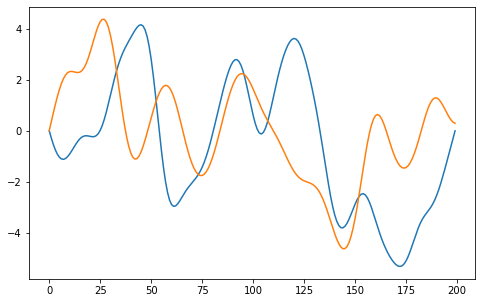

In [41]:
arm1=GP_Arm(lengthscale=8, variance=5,sigma=0.1, T=200)
arm2=GP_Arm(lengthscale=10, variance=5,sigma=0.1, T=200)

plt.plot(arm1.arm_path)
plt.plot(arm2.arm_path)

In [1]:
C_holder = [0]

In [ ]:
for C in C_holder:
  
  regret_DPTS = []
  regret_DPPM = []

  N = 250
  T = 200
  
  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):

    T=200

    arm1=GP_Arm(lengthscale=8, variance=5,sigma=0.1, T=200)
    arm2=GP_Arm(lengthscale=10, variance=5,sigma=0.1, T=200)
    
 
    regret_holder1,_ = general_DPTS(C,1,arm1,arm2)
    regret_holder2,_ = general_DPTS(C,0,arm1,arm2)
    

    regret_DPTS.append(regret_holder1)
    regret_DPPM.append(regret_holder2)
    

  regret_record1 = np.array(regret_DPTS).reshape(N,T)
  regret_record2 = np.array(regret_DPPM).reshape(N,T)


  # np.savetxt('result/experiment3 data/GPRTS_cost'+str(C)+'.csv', regret_record1, delimiter=',')
  # np.savetxt('result/experiment3 data/DPTS_cost'+str(C)+'.csv', regret_record2, delimiter=',')
  # np.savetxt('result/experiment3 data/DPPM_cost'+str(C)+'.csv', regret_record3, delimiter=',')

: 

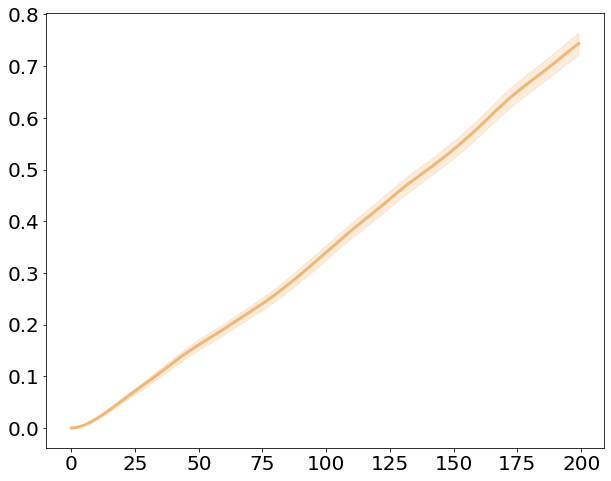

In [7]:
regret_cumsum1=np.cumsum(regret_record1,axis=1)
cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)


regret_cumsum2=np.cumsum(regret_record2,axis=1)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

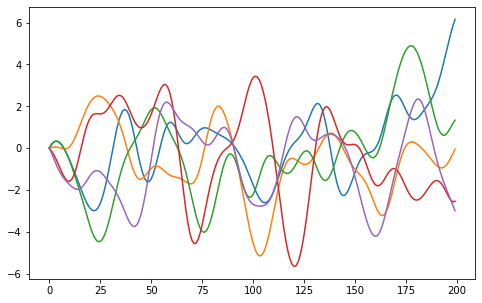

In [8]:
for exp in range(5):

    T=200

    arm1=GP_Arm(lengthscale=8, variance=5,sigma=0.1, T=200)
    arm2=GP_Arm(lengthscale=10, variance=5,sigma=0.1, T=200)
    
    plt.plot(arm1.arm_path)